In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 


In [4]:
M = np.array([[0,1,0],[0,0,2],[3,0,0]])
N = np.array([[1,-1,1],[1,1,-1],[-1,1,1]])
print(M)
print(N)

[[0 1 0]
 [0 0 2]
 [3 0 0]]
[[ 1 -1  1]
 [ 1  1 -1]
 [-1  1  1]]


In [5]:
print(N*M)

[[ 0 -1  0]
 [ 0  0 -2]
 [-3  0  0]]


In [6]:
print(M*N)
print()
print(M.dot(N))

[[ 0 -1  0]
 [ 0  0 -2]
 [-3  0  0]]

[[ 1  1 -1]
 [-2  2  2]
 [ 3 -3  3]]


In [7]:
print(M@N)

[[ 1  1 -1]
 [-2  2  2]
 [ 3 -3  3]]


Quand on definit les matrices par des tableau, le produit matriciel ne se fait pas avec l'operation * mais @, * multiplie composante par composante, tandis que @ réalise l'opération usuelle. 

In [8]:
M = np.matrix("0 1 0; 0 0 2; 3 0 0")
N = np.matrix("1 -1 1; 1 1 -1; -1 1 1")
print(M)
print()
print(N)

[[0 1 0]
 [0 0 2]
 [3 0 0]]

[[ 1 -1  1]
 [ 1  1 -1]
 [-1  1  1]]


In [9]:
print(M*N)

[[ 1  1 -1]
 [-2  2  2]
 [ 3 -3  3]]


In [10]:
M = np.matrix("1 2 3 1; 1 5 7 2; 1 11 13 3")
print(M)

[[ 1  2  3  1]
 [ 1  5  7  2]
 [ 1 11 13  3]]


In [11]:
U = np.copy(M)
a,b = U[1,0]/U[0,0], U[2,0]/U[0,0]
U[1,:] = U[1,:]-a*U[0,:]
U[2,:] = U[2,:]-b*U[0,:]

In [12]:
print(U)


[[ 1  2  3  1]
 [ 0  3  4  1]
 [ 0  9 10  2]]


In [13]:
c = U[2,1]/U[1,1]
U[2,:] =  U[2,:] - c*U[1,:]
print(U)

[[ 1  2  3  1]
 [ 0  3  4  1]
 [ 0  0 -2 -1]]


In [14]:
print(M)

[[ 1  2  3  1]
 [ 1  5  7  2]
 [ 1 11 13  3]]


Pivot de gauss ! 

On garde une trace de M ! 


a, b represent le rapport entre L1 et L2 puis L1 et L3. c le raport entre L2-aL1 et L3-bL1 
U nous permet de representer le systeme et de pouvoir le manipuler sans changer la valeur de la matrice M

In [15]:
A = np.matrix("1 2 3; 4 5 6; 7 8 9")
B = np.matrix("10; 11; 12")
print(A,"\n\n",B,"\n")
print(np.matrix(np.hstack([A,B])))

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[10]
 [11]
 [12]] 

[[ 1  2  3 10]
 [ 4  5  6 11]
 [ 7  8  9 12]]


In [49]:
def func1(n,m): 
    """
    renvoie une matrice en fonction d'une expression
    """
    l = [[0]*n]*m
    
    for i in range(1,n+1): 
        for j in range(1,m+1): 
            l[i-1][j-1] = 5 - abs(i-j)
    s = ''
    for i in range(n): 
        for j in range(m):
            s+=' '
            s+=str(5 - abs(i-j))
        s+= ';'
    
    return np.matrix(s[1:-1])
A = func1(5,5)
B = np.matrix("1; 1; 1; 1; 1")
print(A)       

[[5 4 3 2 1]
 [4 5 4 3 2]
 [3 4 5 4 3]
 [2 3 4 5 4]
 [1 2 3 4 5]]


In [50]:
U = np.matrix(np.hstack([A,B]))
a,b,c,d = U[1,0]/U[0,0], U[2,0]/U[0,0], U[3,0]/U[0,0], U[4,0]/U[0,0]
U[1,:] = U[1,:]-a*U[0,:]
U[2,:] = U[2,:]-b*U[0,:]
U[3,:] = U[3,:]-c*U[0,:]
U[4,:] = U[4,:]-d*U[0,:]

e,f,g = U[2,1]/U[1,1],U[3,1]/U[1,1],U[4,1]/U[1,1]
U[2,:] =  U[2,:] - e*U[1,:]
U[3,:] =  U[3,:] - f*U[1,:]
U[4,:] =  U[4,:] - g*U[1,:]

h,i = U[3,2]/U[2,2],U[4,2]/U[2,2]
U[3,:] =  U[3,:] - h*U[2,:]
U[4,:] =  U[4,:] - i*U[2,:]

j = U[4,3]/U[3,3]

U[4,:] =  U[4,:] - j*U[3,:]
print(U)

[[5 4 3 2 1 1]
 [0 1 1 1 1 0]
 [0 0 2 1 1 0]
 [0 0 0 2 1 0]
 [0 0 0 0 1 0]]


In [63]:

def echelon1(M):
    a,b= np.shape(M)
    print(a,b)
    p = 0 
    for k in range(p,a):
        for i in range(k+1,a):
            M[i,:] = M[i,:] - (M[i,k]/M[k,k])*M[k,:]
    return M

print(np.matrix(np.hstack([A,B])))
print(echelon1(np.matrix(np.hstack([A,B]))))


[[5 4 3 2 1 1]
 [4 5 4 3 2 1]
 [3 4 5 4 3 1]
 [2 3 4 5 4 1]
 [1 2 3 4 5 1]]
5 6
[[5 4 3 2 1 1]
 [0 1 1 1 1 0]
 [0 0 2 1 1 0]
 [0 0 0 2 1 0]
 [0 0 0 0 1 0]]


In [84]:
def phi(t,A): 
    I3 = np.matrix("1 0 0; 0 1 0; 0 0 1")
    return np.linalg.det(A-t*I3)

In [85]:
A = np.matrix("0 2 -1; 3 -2 0; -2 2 1")

-3.330669073875464e-16


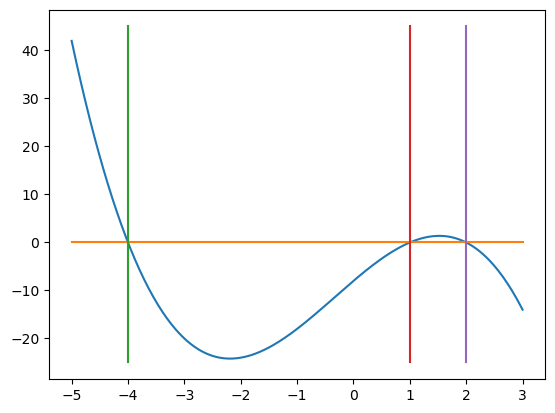

In [100]:
def phi2(t):
    L = [phi(i,A) for i in t ]
    return L

print(phi(1,A))
x = np.linspace(-5,3,300)
y = phi2(x)
y = np.array(y)
plt.plot(x,y)
plt.plot(x,np.array([0]*300))
plt.plot(np.array([-4]*2),np.linspace(-25,45,2))
plt.plot(np.array([1]*2),np.linspace(-25,45,2))
plt.plot(np.array([2]*2),np.linspace(-25,45,2))